In [37]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Load your data
data = pd.read_csv("../Data_Analysis/remerged_df.csv")


In [38]:
data.head()

,Smoking,Alcohol Consumption,Exercise Hours Per Week,Diet,Stress Level,Sedentary Hours Per Day,BMI,Physical Activity Days Per Week,Sleep Hours Per Day,Cholesterol,...,Oceania,South America,Northern Hemisphere,Southern Hemisphere,Age,Sex,Income,Family History,Obesity,Heart Attack Risk
0,1,0,4.168189,1,9,6.615001,31.251233,0,6,208,...,0.0,1.0,0.0,1.0,67,0,261404,0,0,0
1,1,1,1.813242,2,1,4.963459,27.194973,1,7,389,...,1.0,0.0,1.0,0.0,21,0,285768,1,1,0
2,0,0,2.078353,3,9,9.463426,28.176571,4,4,324,...,0.0,0.0,1.0,0.0,21,1,235282,0,0,0
3,1,1,9.828130,1,9,7.648981,36.464704,3,4,383,...,1.0,0.0,1.0,0.0,84,0,125640,1,0,0
4,1,0,5.804299,2,6,1.514821,21.809144,1,5,318,...,0.0,0.0,1.0,0.0,66,0,160555,1,1,0


In [44]:
# data.info()

In [45]:
# Define columns to standardize
columns_to_standardize = ['Exercise Hours Per Week','Diet','Sedentary Hours Per Day', 'Income','Physical Activity Days Per Week','Triglycerides','BMI','Sleep Hours Per Day','Cholesterol','Stress Level']

# Create a scaler
scaler = StandardScaler()

# Fit and transform the selected columns
data[columns_to_standardize] = scaler.fit_transform(data[columns_to_standardize])


In [41]:
data.head()

,Smoking,Alcohol Consumption,Exercise Hours Per Week,Diet,Stress Level,Sedentary Hours Per Day,BMI,Physical Activity Days Per Week,Sleep Hours Per Day,Cholesterol,...,Oceania,South America,Northern Hemisphere,Southern Hemisphere,Age,Sex,Income,Family History,Obesity,Heart Attack Risk
0,1,0,-1.010838,-1.228331,1.234604,0.179251,0.373454,-1.528843,-0.514750,-0.641579,...,0.0,1.0,0.0,1.0,67,0,1.280130,0,0,0
1,1,1,-1.418027,-0.006692,-1.563129,-0.297225,-0.268479,-1.090738,-0.011823,1.596895,...,1.0,0.0,1.0,0.0,21,0,1.582523,1,1,0
2,0,0,-1.372188,1.214948,1.234604,1.001031,-0.113134,0.223577,-1.520604,0.793023,...,0.0,0.0,1.0,0.0,21,1,0.955917,0,0,0
3,1,1,-0.032188,-1.228331,1.234604,0.477557,1.198524,-0.214528,-1.520604,1.522691,...,1.0,0.0,1.0,0.0,84,0,-0.404902,1,0,0
4,1,0,-0.727941,-0.006692,0.185454,-1.292170,-1.120826,-1.090738,-1.017677,0.718820,...,0.0,0.0,1.0,0.0,66,0,0.028445,1,1,0


In [42]:
data.describe()

,Smoking,Alcohol Consumption,Exercise Hours Per Week,Diet,Stress Level,Sedentary Hours Per Day,BMI,Physical Activity Days Per Week,Sleep Hours Per Day,Cholesterol,...,Oceania,South America,Northern Hemisphere,Southern Hemisphere,Age,Sex,Income,Family History,Obesity,Heart Attack Risk
count,8763.000000,8763.000000,8.763000e+03,8.763000e+03,8.763000e+03,8.763000e+03,8.763000e+03,8.763000e+03,8.763000e+03,8.763000e+03,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8.763000e+03,8763.000000,8763.000000,8763.000000
mean,0.896839,0.598083,6.648922e-17,-1.978460e-16,-6.324584e-17,-6.162416e-17,-2.610918e-16,-2.594701e-17,-1.824399e-16,5.594825e-17,...,0.098140,0.155426,0.645898,0.354102,53.707977,0.302636,1.652095e-16,0.492982,0.501426,0.358211
std,0.304186,0.490313,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,...,0.297521,0.362331,0.478268,0.478268,21.249509,0.459425,1.000057e+00,0.499979,0.500026,0.479502
min,0.000000,0.000000,-1.731130e+00,-1.228331e+00,-1.563129e+00,-1.728837e+00,-1.723282e+00,-1.528843e+00,-1.520604e+00,-1.729898e+00,...,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,-1.715281e+00,0.000000,0.000000,0.000000
25%,1.000000,0.000000,-8.701960e-01,-1.228331e+00,-8.636957e-01,-8.640384e-01,-8.654242e-01,-6.526332e-01,-1.017677e+00,-8.394550e-01,...,0.000000,0.000000,0.000000,0.000000,35.000000,0.000000,-8.682223e-01,0.000000,0.000000,0.000000
50%,1.000000,1.000000,9.557563e-03,-6.691624e-03,-1.642626e-01,-1.732987e-02,-1.937807e-02,-2.145280e-01,-1.182278e-02,-1.084870e-02,...,0.000000,0.000000,1.000000,0.000000,54.000000,0.000000,-4.929614e-03,0.000000,1.000000,0.000000
75%,1.000000,1.000000,8.707198e-01,1.214948e+00,8.848870e-01,8.728487e-01,8.598357e-01,6.616823e-01,9.940317e-01,8.672267e-01,...,0.000000,0.000000,1.000000,1.000000,72.000000,1.000000,8.624216e-01,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.726389e+00,1.214948e+00,1.584320e+00,1.732644e+00,1.757569e+00,1.537893e+00,1.496959e+00,1.732935e+00,...,1.000000,1.000000,1.000000,1.000000,90.000000,1.000000,1.758592e+00,1.000000,1.000000,1.000000


#### Multiple combination models will be explored.

In [46]:
import itertools
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score


### Load and Prepare Data

In [47]:
# Splitting the data into features (X) and target variable (y)
X = data.drop(columns=['Heart Attack Risk'])  # Features
y = data['Heart Attack Risk']  # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=80)


### Define Classifiers

In [48]:
# Define different classifiers
knn_classifier = KNeighborsClassifier()
logistic_classifier = LogisticRegression(max_iter=500)
gb_classifier = GradientBoostingClassifier(n_estimators=50, random_state=80)
svc_classifier = SVC(kernel='rbf', probability=True, random_state=80)

# Define a dictionary of classifiers
classifiers = {
    'KNN': knn_classifier,
    'Logistic Regression': logistic_classifier,
    'Gradient Boosting': gb_classifier,
    'Support Vector Machine': svc_classifier
}


### Generate Combinations and Evaluate Accuracy

In [49]:
# Lists to store results
combination_names = []
accuracies = []
confusion_matrices = []

# Generate combinations of classifiers
for r in range(1, len(classifiers) + 1):
    for combo in itertools.combinations(classifiers.items(), r):
        # Create a Voting Classifier with the current combination
        current_names = list(dict(combo).keys())
        voting_classifier = VotingClassifier(estimators=list(combo), voting='soft')
        voting_classifier.fit(X_train, y_train)
        y_pred = voting_classifier.predict(X_test)
        
        # Evaluate performance
        accuracy = accuracy_score(y_test, y_pred)
        confusion = confusion_matrix(y_test, y_pred)
        
        # Store results
        combination_names.append(', '.join(current_names))
        accuracies.append(accuracy)
        confusion_matrices.append(confusion)


### Visualize Accuracies

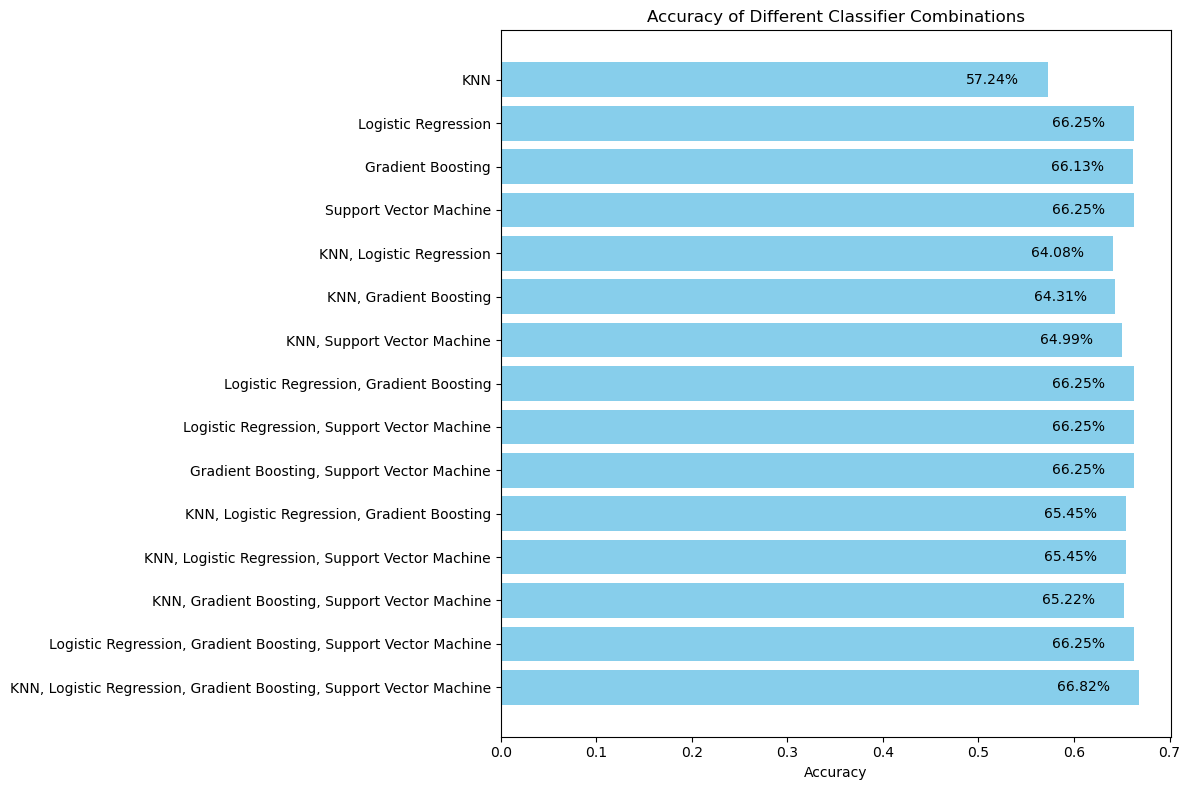

In [50]:
# Plotting the accuracies for different combinations with percentage visualization
plt.figure(figsize=(12, 8))
bars = plt.barh(combination_names, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Accuracy of Different Classifier Combinations')
plt.gca().invert_yaxis()  # Invert y-axis to have combinations at the top

# Add percentage values on the bars
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_width() - 0.03, bar.get_y() + bar.get_height() / 2, f'{acc*100:.2f}%', 
             va='center', ha='right', color='black')

plt.tight_layout()
plt.show()


##### In terms of accuracy, the Logistic Regression, SVM, and Gradient Booster models all exhibited a similar performance, hovering around a 66% accuracy rate. Across various combination models, there wasn't a notable substantial difference in their accuracy levels.For the stremlet app, the choice leans towards utilizing the Gradient Booster model due to its handle both numerical and categorical data effectively, making it versatile for diverse datasets commonly encountered in applications.